# Lab 9: Matching Markets {-}
Welcome to the 9th DS102 lab! 

The code you need to write is commented out with a message "TODO: fill in". There is additional documentation for each part as you go along.

## Collaboration Policy {-}
Data science is a collaborative activity. While you may talk with others about the labs, we ask that you **write your solutions individually**. If you do discuss the assignments with others please **include their names** in the cell below.

## Gradescope Submission {-}
To submit this assignment, rerun the notebook from scratch (by selecting Kernel > Restart & Run all), and then print as a pdf (File > download as > pdf) and submit it to Gradescope.


**This assignment should be completed and submitted before Thursday, Nov 12th, 2020 at 11:59 PM. PST**


## Collaborators {-}
Write the names of your collaborators in this cell.

`<Collaborator Name> <Collaborator e-mail>`

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)
sns.set(style="dark")
plt.style.use("ggplot")

from gs_platform import Platform # <---- check out the gs_platform.py file in the lab folder

%matplotlib inline

/Users/mcurmei/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Matching Markets {-}

In this lab we will combine ideas from Multi Armed Bandits (MAB) and Stable Matching (SB). In Question 1 you will design a matching algorithm for the case when the preferences of both sides are known. In Question 2 we will extend the approach to consider cases when the preferences of the players are not known and have to be learned.

This lab is inspired by the paper: [Liu, Lydia T., Horia Mania, and Michael Jordan. "Competing bandits in matching markets." International Conference on Artificial Intelligence and Statistics. PMLR, 2020.](https://arxiv.org/pdf/1906.05363.pdf)

## Setup: {-}
We will consider the following Matching Markets setup. There are $n$ players and $n$ arms. Let $\mu_{ij}$ be the average reward arm $i$ gives to user $j$. This means that each arm $i$ has a preference over users. The most preferred player for arm $i$ is $\arg\max_j(\mu_{ij})$ while the least preferred player $\arg\min_j(\mu_{ij})$. Similarly each user $j$ has a preference over arms. We will assume that all average rewards $\mu_{ij}$ are distinct, which means that all the preferences are *strict preferences*.

In this setting, typically, the arms **know their own preferences** over players. Meaning that arm $i$ knows all the mean rewards $\mu_{ij}, j =1\ldots n$. However, the players **do not know their own preferences** over arms. This means that any algorithm designed to match players to arms must help players **learn their preferences**.

First we will talk about two restrictions of this setup:

### Multi-Armed Bandits (MAB): {-}
If there is only one player and $n$ arms this problem becomes and instance of Multi-Armed Bandits. Take another look at Lab 8 to convince yourself that this is the case. In MAB problems the goal is to pick arms in a way that incurs as little Regret as possible when compared to the best arm in hindsight. Therefore, put another way, in a MAB problem the goal of the player is to learn their own preferences over arms as quickly as possible.

### Stable-Matching (SM): {-}
In multi-player settings, if each player knew their preferences, then, this becomes an instance of a Stable Matching problem. To see this connection with the SM example from lecture, imagine that the players are the *drummers* and the arms are the *bands*. The goal is to find a Matching between players and arms such that there are no blocking pairs.


# Question 1: Stable Matching {-}

In this question we will assume that each player $j$ knows the rewards associated with each of the arms: $\{\mu_{1,j}, \mu_{2,j}, \ldots, \mu_{n,j}\}$.

#### Matching: {-}
A Matching $M$ is a set of $n$ (player-arm) pairs of the form $(j', i')$. Such that:

- Each player $j'$ appears in exacly one pair in $M$.
- Each arm $i'$ appears in exactly one pair in $M$.

#### Blocking Pair: {-}
A pair $(j^*, i^*)\notin M$, is a *blocking pair* for $M$ if both conditions hold:

- Player $j^*$ would prefer arm $i^*$ over the current match in $M$.
- Arm $i^*$ would prefer player $j^*$ over the current match in $M$.
This means that a blocking pair would be better off breaking up with their matches and match with eachother.

#### Stable Matching: {-}
A Matching $M$ is *stable* if there are no blocking pairs.

## Gale-Shapley Algorithm for Stable Matching {-}
The Gale-Shapley Deferred Acceptance is an Algorithm to create stable matchings. The algorithm proceeds as follows:

    INITIALIZE all ARMS and PLAYERS as FREE
    INITIALIZE empty matching set M
    WHILE (some arm i is unmatched):
        LET j <- first player in the preference order to whom arm i has not made a proposal yet
        IF (j is free);
            ADD (j, i) to matching M
        ELSE IF (j prefers i to current matching i’)
        Replace old (j, i') pair with new (j, i) in matching M
    ELSE 
       j rejects i
       
### 1.a Identify stable matchings and blocking pairs {-}
Run the code below to initialize the $\mu_{i,j}$ parameters of a preference matrix. Identify which of the 3 proposed matches is stable. For the unstable mathches indentify the blocking pairs

In [2]:
# Run this cell to initialize preferences
n = 4
arm_names = ['Arm_{}'.format(i) for i in range(n)]
player_names = ['Player_{}'.format(i) for i in range(n)]
rewards_mat = np.array([6.5, 4.8, 5.7, 6.1, 8.2, 7.3, 6.2, 7.8, 5.7, 6.9, 5.5, 5.9, 7.6, 8.5, 5.7, 5.0]).reshape(n,n)
rewards_df = pd.DataFrame(rewards_mat, columns=player_names)
rewards_df.index = arm_names

(rewards_df.style
  .background_gradient(cmap=cm, axis = None)
  .set_caption('Rewards of each arm-player pair')
  .format("{:.2}")
)


,Player_0,Player_1,Player_2,Player_3
Arm_0,6.5,4.8,5.7,6.1
Arm_1,8.2,7.3,6.2,7.8
Arm_2,5.7,6.9,5.5,5.9
Arm_3,7.6,8.5,5.7,5.0


#### `TODO:` for each of the propossed matchings below, determine if the matching is stable. If the matching is unstable find at least one blocking pair. {-}

- *(i)*: $M=\{(Player_0, Arm_0), (Player_1, Arm_2), (Player_2, Arm_3), (Player_3, Arm_1)\}$
- *(ii)*: $M=\{(Player_0, Arm_1),(Player_1, Arm_3),(Player_2, Arm_0),(Player_3, Arm_2)\}$
- *(iii)*: $M=\{(Player_0, Arm_1),(Player_1, Arm_3),(Player_2, Arm_2),(Player_3, Arm_0)\}$


`TODO: fill in`

- *(i)*: (Player_0, Arm_1) is a blocking pair. Player_0 would prefer Arm_1 over the current match (Arm 0), and Arm_1 would prefer Player_0 over the current match Player_3. 
- *(ii)*: (Player_3, Arm_0) is a blocking pair. Player_3 would prefer Arm_0 over the current match (Arm_2), and Arm_0 would prefer Player_3 over the current match Player_2.
- *(iii)*: This is a stable matching, there are no blocking pairs.

### 1.b Implement Gale-Shapley Algorithm {-}

In [3]:
# Helper functions: Do not modify
def get_preference_list(reward_list):
    """Given a list of rewards computes the preference list
    
    Inputs:
        reward_list : list of floats containing rewards
        
    Outputs:
        preference_list : list of int, which ranks the options in decreasing order of rewards
            i.e. if preference_list = [2,0,1], it means that max(reward_list) = reward_list[2] and 
                                                             min(reward_list) = rewards_list[1]
    """
    reward_list = np.array(reward_list)
    preference_list = np.argsort(reward_list)
    preference_list = preference_list[::-1]
    return preference_list

def is_new_preferred_to_old(preference_list, new, old):
    """Given a preference list determine whether the new option is preferred to the old option
    
    Inputs:
        preference_list : list of int, of size n, where each element between 0 and n-1 occurs exactly once
        new : int, index of the new option
        old : int, index of the old option
        
    Outputs:
        result : bool, returns True if new index is ahead of the old index in the preference list.
        """
    
    old_index_in_preference_list = list(preference_list).index(old)
    new_index_in_preference_list = list(preference_list).index(new)
    
    return new_index_in_preference_list < old_index_in_preference_list

`TODO`: Complete the function below to obtain the Arm-optimal matchings

In [4]:
# TODO: fill in
# Hint: the helper function defined above could be useful in computing this function
def get_gale_shapley_matching(arm_preference_dict, player_preference_dict):
    """ Find the arm-proposing Gale-Shapley matching
    
    Inputs:
        arm_preferance_dict : dict {int:list}
            arm_preferance_dict[i] contains the preference list over players for arm i
        player_preferance_dict : dict  {int:list}
            player_preferance_dict[i] contains the preference list over arms for player i
        how : string, default 'player'
            one of 'player' or 'arm'
    Outputs:
        matching : dict, a dictionary of final matchings with n key-value pairs,
            key is the player and the value is the arm in the matching
            
    """
    # get the number of arms
    n = len(arm_preference_dict)
    
    # initialize the players and arms as unmatched
    is_unmatched_player = np.array([True]*n)
    is_unmatched_arm = np.array([True]*n)
    
    # initialize empty dictionary for current matchings
    matching = {player:None for player in range(n)}
    
    # create a dictionary to record the rejected proposals
    rejected_proposals ={arm:[] for arm in range(n)}
    
    # TODO: implement the logic in the while loop
    while any(is_unmatched_arm) or any(is_unmatched_player):
        curr_arm = np.where(is_unmatched_arm)[0][0] # index of the first arm in the current list of unmatched arms
        past_proposals = rejected_proposals[curr_arm]
        preference_order = arm_preference_dict[curr_arm]
        restricted_preference_order = [player for player in preference_order if player not in list(past_proposals)]
        curr_player = restricted_preference_order[0]
        if is_unmatched_player[curr_player]:
            # create a matching
            matching[curr_player] = curr_arm
            # update the list of unmatched players and arms
            is_unmatched_arm[curr_arm] = False
            is_unmatched_player[curr_player] = False
        else:
            old_arm = matching[curr_player]
            if is_new_preferred_to_old(player_preference_dict[curr_player], curr_arm, old_arm):
                # create a matching
                matching[curr_player] = curr_arm
                # update the list of unmatched players and arms
                is_unmatched_arm[curr_arm] = False
                is_unmatched_arm[old_arm] = True
            else:
                rejected_proposals[curr_arm].append(curr_player)
    return matching 

In [5]:
# Validation Test
# Compute the Arm Optimal Gale-Shaply matching for the example in 1.a.

arm_preference_dict = {k: get_preference_list(rewards_mat[k,:]) for k in range(n)} 
player_preference_dict = {k: get_preference_list(rewards_mat[:,k]) for k in range(n)}

matching = get_gale_shapley_matching(arm_preference_dict, player_preference_dict)
print(matching)
assert matching == {0: 1, 1: 3, 2: 2, 3: 0}
print('Test Passed!')

{0: 1, 1: 3, 2: 2, 3: 0}
Test Passed!


In [6]:
# More comprehensive validation tests
test_arm_dict = {0: [1, 3, 0, 5, 2, 4],
                 1: [3, 0, 1, 2, 5, 4],
                 2: [3, 5, 1, 4, 2, 0],
                 3: [0, 5, 4, 2, 3, 1],
                 4: [4, 1, 5, 0, 2, 3],
                 5: [5, 0, 2, 1, 3, 4]}
test_player_dict = {0: [5, 3, 1, 0, 4, 2],
                    1: [0, 2, 4, 1, 5, 3],
                    2: [5, 1, 4, 3, 2, 0],
                    3: [1, 0, 2, 3, 5, 4],
                    4: [4, 2, 3, 1, 0, 5],
                    5: [5, 2, 3, 0, 4, 1]}
test_matching = get_gale_shapley_matching(test_arm_dict, test_player_dict)
assert test_matching == {0: 3, 1: 0, 2: 2, 3: 1, 4: 4, 5: 5}
print("Test passed!")

Test passed!


# Question 2. Competing Bandits {-}

Now we assume that we are in the Competing Bandits setting, where players do not know their preference over arms. There goal of the players in to learn their preferences as quickly as possible. Here we will use the Centralized Gale-Shapley UCB proposed in Lydia's and Horia's [paper](https://arxiv.org/pdf/1906.05363.pdf).

## Setup {-}

At each time step the players are required to send a ranking of the arms to a centralized matching platform. The  platform takes in the players’ preferences at each time step and outputs a stable matching between the arms and players. The players pull their assigned arm and observe a reward. When player $j$ pulls arm $i$, the player gets a reward from $\mathcal{N}(\mu_{ij}, \sigma^2_{ij})$. Therefore players must rank arms in a way which enables exploration and exploitation.

## Centralized GS-UCB Algorithm {-}

At each time-step $t$, keep track of the following:

- $T_{ij}(t)$:  number of times player $j$ pulled arm $i$, up to time $t$.
- $X_{ij}^{(1)},...,X_{ij}^{(T_{ij}(t))}$: the samples that player $j$ received from arm $i$ by time $t$. 

Let $\hat \mu_{ij}(t)$ be the mean of those samples: 
$$\hat \mu_{ij}(t) = \frac{1}{T_{ij}(t)}\sum_{k=1}^{T_{ij}(t)}X_{ij}^{(k)}$$

Similarly to the previous lab, we define $C_{ij}(t, \delta)$ the width of the confidence bound al level $\delta$.
$$C_{ij}(t, \delta) = \sigma_{ij}\sqrt{\frac{2\log{1/\delta}}{T_{ij}(t)}}.$$

Similarly to Lab 8, if $T_{i,j} = 0$, then we set $\hat \mu_{ij}(t) = C_{ij}(t, \delta) = \infty$
We will choose a $\delta$ that decreases with time to ensure that the players explore the arms at first: 
$$\delta=\frac{1}{t^3}$$

Each player $j$ computes a preference list over arms, by ranking the arms in decreasing order of upper confidence bounds $\hat \mu_{ij}(t) + C_{ij}(t, \delta) \ \  i = 1\ldots n$

Subsequently, each player submits their preference lists to the centralized platform. The plaform runs the Gale Shapley matching algorithm to compute the matching.

Finally each user gets to pull only 1 arm corresponding to the assigned match.

### 2.a Compute a preference list over arms given past history {-}
`TODO`: fill in the function below

In [7]:
# TODO: complete this function
# Hint: Recall the UCB_pull_arm function you completed in the previous lab
def get_UCB_preference_list(t, standard_deviations, times_pulled, rewards):
    """ Implement the choice of arm for the UCB algorithm
    
    Inputs:
        t : int, current iteration
        standard_deviations : a list of length n (where n is the number of arms) of the 
            standard deviations associates with each arm
        times_pulled: a list of length n (where n is the number of arms) of the number 
            of times each arm has been pulled.
        rewards: a list of n lists. Each of the n lists holds the samples received from
            pulling each arm up to iteration t. 

    Outputs:
        preference_list: list of int, which ranks the arms in decreasing order of upper confidence bounds
    """

    n = len(times_pulled)
    delta = 1/(t**3)
    
    confidence_bounds=[]
    for arm in range(n):
        if times_pulled[arm]==0:
            confidence_bounds.append(np.inf)
        else:
            confidence_bounds.append(np.mean(rewards[arm])+standard_deviations[arm]*
                                     np.sqrt((2/(times_pulled[arm]))*np.log(1/delta))) 
            
    preference_list = get_preference_list(confidence_bounds) # TODO: fill in
                                                             # Hint: one of the helper functions defined earlier
                                                             #       might be useful here
        
    return preference_list

In [8]:
# Validation tests, do not modify
times_pulled_test = [3, 5, 7, 4, 0]
t_test = np.sum(times_pulled_test) + 1
standard_deviations_test = [0.4, 0.2, 0.1, 0.2, 0.5]
rewards_test = [[10.4, 10.6, 11], 
                [8, 13, 12, 11, 9], 
                [9, 10, 10, 8, 9.5, 10.5, 11],
                [8.3, 9.6, 7.9, 8.1],
                []]
preference_list = get_UCB_preference_list(t_test, standard_deviations_test, times_pulled_test, rewards_test)
assert list(preference_list) == [4, 0, 1, 2, 3]
print("Test Passed!")

Test Passed!


### Regret {-}

At each time step the players produce preference lists and submit them to the centralized platform. The platform then computes stable matches according to the declared preferences of players and true preferences of arms via Gale-Shapley algorithm. Denote by $m_j(t)$ the match assigned to player $j$ at time $t$. Denote by $m_j^*$ the Arm-Optimal stable match for player $j$, if player $j$ knew their true preference over the arms.

In this setting regret for each player is defined with respect to the 'true' stable matching $m^*$.

Regret for player $j$ over time horizon $T$ is defined as:
$$ Regret_j(T)= \sum_{t=1}^T X_{m^*_j,j}^{(t)} - X_{m_j(t), j}^{(t)}$$

Most of the time, it is simpler to analyze the __pseudo-regret__, which is the mean of the regret.

$$ R_j(T)= T \mu_{m^*_j, j} - \mathbb{E}\left[\sum_{t=1}^T X_{m_j(t), j}^{(t)}\right]$$

In the cell below we simulate the Centralized GS-UCB Algorithms for the preferences defined below:
We simulate a horizon of $T=5000$ steps. Assume that all $\sigma_{ij} = 1$.

In [9]:
# Define the time horizon 
T=5000

# Initialize true rewards 
n = 4
means_mat = np.array([6.5, 4.8, 5.7, 6.1, 8.2, 7.3, 6.2, 7.8, 5.7, 6.9, 5.5, 5.9, 7.6, 8.5, 5.7, 5.0]).reshape(n,n)
sd = 1
sd_mat = np.ones([n,n])*sd

# Initilize Platform <- take a look at gs_platform.py file
platform = Platform(means_mat, sd_mat, get_UCB_preference_list, get_gale_shapley_matching)

# Run Competing Bandits Matching Market
platform.run(T)

In [10]:
# Print the number of times the players pulled each arm:
times_pulled_df = pd.DataFrame.from_dict(platform.times_pulled, orient='columns', dtype=int)
times_pulled_df.index = arm_names
times_pulled_df.columns = player_names

sm = {'Player_{}'.format(k): 'Arm_{}'.format(v) for k,v in platform.true_matching.items()}
print("The true stable matching is: {}".format(sm))
(times_pulled_df.style
  .background_gradient(cmap=cm, axis = None)
  .set_caption('Number of times each arm-player pair is played')
)

The true stable matching is: {'Player_0': 'Arm_1', 'Player_1': 'Arm_3', 'Player_2': 'Arm_2', 'Player_3': 'Arm_0'}


,Player_0,Player_1,Player_2,Player_3
Arm_0,14,0,728,4258
Arm_1,4960,1,1,38
Arm_2,7,20,4270,703
Arm_3,19,4979,1,1


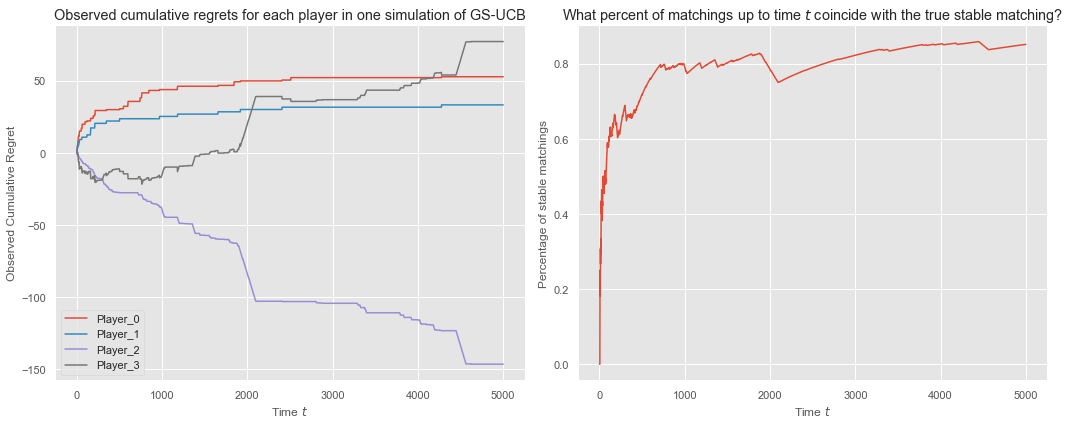

In [11]:
# Do not modify: Run to create plots
fig, axs = plt.subplots(1,2)
fig.set_figwidth(15)
fig.set_figheight(6)

# Plot the observed regret
for player in range(n):
    axs[0].plot(platform.regret[player], label='Player_{}'.format(player)) 
axs[0].set_xlabel('Time $t$')
axs[0].set_ylabel('Observed Cumulative Regret')
axs[0].legend()
axs[0].set_title("Observed cumulative regrets for each player in one simulation of GS-UCB")

# Plot percentage of stable matchings
percentage_stable_at_time_t = [platform.stable_count[t]/t for t in range(1,T+1)]
axs[1].plot(percentage_stable_at_time_t)
plt.tight_layout()
axs[1].set_xlabel('Time $t$')
axs[1].set_ylabel('Percentage of stable matchings')
axs[1].set_title('What percent of matchings up to time $t$ coincide with the true stable matching?')
plt.tight_layout()
plt.show()  

## 2.b Answer the following questions: {-}
- (i) The cumulative regret of Player 0 and Player 1 is strictly increasing with time. Why is that the case?
- (ii) The cumulative regret of Player 2 is strictly decreasing with time. Why is that the case?
- (iii) The cumulative regret of Player 3 is sometimes increasing and sometimes decreasing. Why is that the case?

`TODO: fill in`
- (i) The stable matches for Player_0 and Player_1 are the best arms for each of them. Therefore regret is similar to regular bandits as it is measured with respect to the best arm. Every time the agent pulls an arms that is not the best arm, it accumulates regret that cannot decrease.
- (ii) The stable match for Player_2 is Arm_2, which in fact has the lowest average reward among all 4 arms. Regret is thus measured with respect to the worst arm. Every time the agent pulls an arm that is different from Arm_1, the agent on average sees a higher reward than the one corresponding to the stable match. This makes the regret allways be either negative or 0.
- (iii) Lastly Player_3 is matched with an arm that is neither the best arm nor the worst arm for the agent. Therefore the regret at each time step can we either negative, positive or 0, explaing the shape of the cumulative regret curve.

Yay, you've made it to the end of Lab 9!


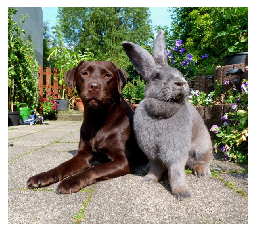

In [12]:
%matplotlib inline
import matplotlib.image as mpimg
img = mpimg.imread('cute_flemish.jpg')
imgplot = plt.imshow(img)
imgplot.axes.get_xaxis().set_visible(False)
imgplot.axes.get_yaxis().set_visible(False)
print("Yay, you've made it to the end of Lab 9!")
plt.show()